# Preparation

This has been tested on Python 3.7, but everything should work with other versions of Python 3+.   

1. Install packages:

<code>pip install singlearity pandas</code>

2. Obtain a free trial of the Singlearity API key by going to (www.singlearity.com) and clicking on the "Contact" link.

# Introduction

## Singlearity

Singlearity is a web-based service for baseball analytics.  It uses machine learning to make predictions based on a wide range of player and historical data.    These predictions can be used to make more effective pre-game and in-game strategy decisions and to provide for more accurate game simulations.

This work was presented at the 2021 SABR Conference and the 2021 Sloan Sports Analytics Conference.   You can view the [technical paper](https://www.singlearity.com/static/assets/sloan-singlearity.pdf) or the [Powerpoint presentation](https://www.singlearity.com/static/assets/Singlearity-sabr.pptx).

You can also view an earlier article about Singlearity that appeared on [Baseball Prospectus](https://www.baseballprospectus.com/news/article/59993/singlearity-using-a-neural-network-to-predict-the-outcome-of-plate-appearances/).


## Python API

The goal of this workbook is to demonstrate the usage of the Singlearity Python API.  While it is possible to access Singlearity using direct HTTP requests, a client library makes handles the low-level communication and makes it easier for you to access Singlearity service. 

There are two additional places to get help with the Python APIs:
1. The [Singlearity examples](https://github.com/singlearity-sports/singlearity-python/tree/master/examples) directory contains an extensive list of examples.
1. The automatically generated [Swagger documents](https://www.singlearity.com/docs) contain a comprehensive list of API arguments.

If you are interested in accessing Singlearity through the <code>R</code> programming language, you can view our [main github page](https://github.com/singlearity-sports) to view our APIs in different programming languages.

# Setup

To start things off, we need to set up our API key and import some types.

In [2]:
import singlearity
from singlearity import State, Player, Team, Venue, Atmosphere, Matchup, ApiException
from singlearity.rest import ApiException
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import os

configuration = singlearity.Configuration()
configuration.host = os.environ.get("SINGLEARITY_API_SERVER", "https://api.singlearity.com")
configuration.api_key['SINGLEARITY_API_KEY']='<YOUR_API_KEY>'

# Enter a context with an instance of the API client
with singlearity.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    sing = singlearity.APIsApi(api_client)
    
    #validate that we can connect to the singelarity server
    print(sing.hello())


Hello from Singlearity!!!


# Singlearity Data Structures

## Player

The Player object contains information about a single player.   It is created through a call to 
<code>get_players()</code>.  

<code>get_players()</code> takes a wide range of arguments that can be used to get players meeting particular criteria.  It returns a list of <code>Player</code> objects.  The Singlearity database contains all players who have appeared in a major league game in the last 10 years, and it is updated daily.

In [5]:
smith_players = sing.get_players(name='Smith')

print(f"There are a lot of players named Smith.  Here are the first 10.")
print(smith_players[0:min(len(smith_players), 10)])


There are a lot of players named Smith.  Here are the first 10.
[{'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1990-04-12',
 'current_age': 31,
 'debut_date': '2013-05-11',
 'full_name': 'Burch Smith',
 'mlb_id': 572143,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/572143.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'OAK',
 'team_id': 133}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1991-07-28',
 'current_age': 29,
 'debut_date': '2017-07-17',
 'full_name': 'Caleb Smith',
 'mlb_id': 592761,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/592761.jpg',
 'pitch_hand': 'L',
 'position': 'P',
 'team_abbrev': 'ARI',
 'team_id': 109}, {'active': True,
 'bat_side': 'L',
 'birth_country': 'USA',
 'birth_date': '1995-06-15',
 'current_age': 25,
 'debut_date': '2017-08-11',
 'full_name': 'Dominic Smith',
 'mlb_id': 642086,
 'photo_url': 'https://securea.mlb.com/mlb/images/playe

If multiple arguments are provided to <code>get_players()</code>, the function returns the players satisfying **all** the specified conditions.

Let's get a list of players named Smith who meet additional criteria.

In [22]:
print(sing.get_players(name='Smith', age_min=25, bat_side='L' ))

[{'active': True,
 'bat_side': 'L',
 'birth_country': 'USA',
 'birth_date': '1995-06-15',
 'current_age': 25,
 'debut_date': '2017-08-11',
 'full_name': 'Dominic Smith',
 'mlb_id': 642086,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/642086.jpg',
 'pitch_hand': 'L',
 'position': 'LF',
 'team_abbrev': 'NYM',
 'team_id': 121}, {'active': True,
 'bat_side': 'L',
 'birth_country': 'USA',
 'birth_date': '1996-02-06',
 'current_age': 25,
 'debut_date': '2020-09-12',
 'full_name': 'Pavin Smith',
 'mlb_id': 656976,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/656976.jpg',
 'pitch_hand': 'L',
 'position': '1B',
 'team_abbrev': 'ARI',
 'team_id': 109}, {'active': True,
 'bat_side': 'L',
 'birth_country': 'USA',
 'birth_date': '1992-10-26',
 'current_age': 28,
 'debut_date': '2017-05-18',
 'full_name': 'Dwight Smith Jr.',
 'mlb_id': 596105,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/596105.jpg',
 'pitch_hand': 'R',
 'position'

Here is an example that shows retrieving right-handed pitchers on a specific team.

In [27]:
print(sing.get_players(team_name='Yankees', position='P', pitch_hand='R', on_40=True))

[{'active': True,
 'bat_side': 'R',
 'birth_country': 'Dominican Republic',
 'birth_date': '1995-09-26',
 'current_age': 25,
 'debut_date': '2020-08-08',
 'full_name': 'Albert Abreu',
 'mlb_id': 656061,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/656061.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'NYY',
 'team_id': 147}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'Mexico',
 'birth_date': '1992-04-25',
 'current_age': 29,
 'debut_date': '2016-04-08',
 'full_name': 'Luis Cessa',
 'mlb_id': 570666,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/570666.jpg',
 'pitch_hand': 'R',
 'position': 'P',
 'team_abbrev': 'NYY',
 'team_id': 147}, {'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1990-09-08',
 'current_age': 30,
 'debut_date': '2013-06-11',
 'full_name': 'Gerrit Cole',
 'mlb_id': 543037,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/543037.jpg',
 'pitch_hand': 'R',
 '

The most reliable way to retrieve a player is to use his <code>mlb_id</code>.  This avoids conflicts with two players having the same name (e.g. Will Smith).  It also avoids issues around player names being slightly different in different databases (e.g. Matthew Boyd vs. Matt Boyd)

Note that <code>get_players()</code> always returns a list so you need to extract the 1st player from the list using the <code>[]</code> notation.

In [6]:
print(f"This is a pretty good player:\n{sing.get_players(id=545361)[0]}")

This is a pretty good player:
{'active': True,
 'bat_side': 'R',
 'birth_country': 'USA',
 'birth_date': '1991-08-07',
 'current_age': 29,
 'debut_date': '2011-07-08',
 'full_name': 'Mike Trout',
 'mlb_id': 545361,
 'photo_url': 'https://securea.mlb.com/mlb/images/players/head_shot/545361.jpg',
 'pitch_hand': 'R',
 'position': 'CF',
 'team_abbrev': 'LAA',
 'team_id': 108}


## Team

A Team object is retrieved through <code>get_teams()</code>.   

In [7]:
all_teams = sing.get_teams()
print(f"There are {len(all_teams)} in major league baseball")

new_york_teams = sing.get_teams(name='New York')
print(f"There are {len(new_york_teams)} New York teams")

print(f"The Yankees team is:\n{sing.get_teams(name='Yankees')[0]}")

There are 30 in major league baseball
There are 2 New York teams
The Yankees team is:
{'abbreviation': 'NYY',
 'division': 'American League East',
 'id': 147,
 'league': 'American League',
 'name': 'New York Yankees',
 'team_name': 'Yankees',
 'venue': {'home_team_abbrev': 'NYY',
           'home_team_id': 147,
           'id': 3313,
           'name': 'Yankee Stadium'}}


## Venue

A Venue object is retrieved through a call to </code>get_venues()</code>.  You can retrieve the venue by passing in either the stadium name (partial names are ok) or the team name.


In [12]:
yankee_stadium = sing.get_venues(stadium_name='Yankee Stadium')[0]
print(f"Yankee stadium is:\n{yankee_stadium}")

print(f"The Dodger home field is:\n{sing.get_venues(team_name='Dodgers')[0]}")

Yankee stadium is:
{'home_team_abbrev': 'NYY',
 'home_team_id': 147,
 'id': 3313,
 'name': 'Yankee Stadium'}
The Dodger home field is:
{'home_team_abbrev': 'LAD',
 'home_team_id': 119,
 'id': 22,
 'name': 'Dodger Stadium'}


## State

A State object contains information about the current state of the game. A default state object will contain the state at the beginning of a game.  Be careful about using default state arguments because matchups at the beginning of the game produce outputs that favor the defense.

In [8]:
state_beginning = State()
print(f"A State object with no arguments is:\n{state_beginning}")


A State object with default objects is:
{'bat_lineup_order': 1,
 'bat_score': 0,
 'fld_lineup_order': 1,
 'fld_score': 0,
 'frame_runs_scored': 0,
 'inning': 1,
 'on_1b': False,
 'on_2b': False,
 'on_3b': False,
 'outs': 0,
 'pitch_number': 0,
 'top': True}


In [10]:
exciting_state = State(on_1b=True, on_2b=True, on_3b=True, 
                       inning=5, outs=2, top=False, bat_score=3, fld_score=3, 
                       pitch_number=85)
print(exciting_state)

{'bat_lineup_order': 1,
 'bat_score': 3,
 'fld_lineup_order': 1,
 'fld_score': 3,
 'frame_runs_scored': 0,
 'inning': 9,
 'on_1b': True,
 'on_2b': True,
 'on_3b': True,
 'outs': 2,
 'pitch_number': 35,
 'top': False}


## Atmosphere

An atmosphere object stores information about the playing conditions, including the game location and the weather. 

In [13]:
atmosph = Atmosphere(venue=sing.get_venues(stadium_name='Yankee Stadium')[0],
                     home_team = sing.get_teams(name='Yankees')[0],
                     temperature = 84)
print(atmosph)

{'home_team': {'abbreviation': 'NYY',
               'division': 'American League East',
               'id': 147,
               'league': 'American League',
               'name': 'New York Yankees',
               'team_name': 'Yankees',
               'venue': {'home_team_abbrev': 'NYY',
                         'home_team_id': 147,
                         'id': 3313,
                         'name': 'Yankee Stadium'}},
 'temperature': 84,
 'venue': {'home_team_abbrev': 'NYY',
           'home_team_id': 147,
           'id': 3313,
           'name': 'Yankee Stadium'}}


## Matchup

In order to predict the results of a batter-vs-pitcher matchup, you must create a Matchup.   
A matchup consists of:
* Batter
* Pitcher
* Atmosphere
* State

In [15]:

trout_vs_cole = Matchup(
    batter=sing.get_players(name='Mike Trout')[0]
    ,pitcher=sing.get_players(name='Gerrit Cole')[0]
    ,atmosphere=atmosph
    ,state=exciting_state
)

print(trout_vs_cole)

{'atmosphere': {'home_team': {'abbreviation': 'NYY',
                              'division': 'American League East',
                              'id': 147,
                              'league': 'American League',
                              'name': 'New York Yankees',
                              'team_name': 'Yankees',
                              'venue': {'home_team_abbrev': 'NYY',
                                        'home_team_id': 147,
                                        'id': 3313,
                                        'name': 'Yankee Stadium'}},
                'temperature': 84,
                'venue': {'home_team_abbrev': 'NYY',
                          'home_team_id': 147,
                          'id': 3313,
                          'name': 'Yankee Stadium'}},
 'batter': {'active': True,
            'bat_side': 'R',
            'birth_country': 'USA',
            'birth_date': '1991-08-07',
            'current_age': 29,
            'debut_date': '201

# Generating Predictions

## Batter vs. Pitcher

The <code>get_pa_sim()</code> function is used to retrieve Singlearity predictions for batter-vs-pitcher matchups.  It takes a list of Matchup objects along with some optional arguments and generates predictions about the results of the matchups.  

In [18]:
results = pd.DataFrame(sing.get_pa_sim([trout_vs_cole]))
print(results)

print(f"Expected woba is {results.iloc[0]['woba_exp']}")

   batter  pitcher batter_name pitcher_name  outs  inning  p_pitch_no  on_1b  \
0  545361   543037  Mike Trout  Gerrit Cole     2       9          35      1   

   on_2b  on_3b    bb_exp    ci_exp  double_exp        dp_exp    e_exp  \
0      1      1  0.115572  0.000277    0.034493  5.324848e-28  0.00364   

   f_out_exp   fc_exp  fc_o_exp    fo_exp       gdp_exp   hbp_exp    hr_exp  \
0   0.312798  0.00012  0.000018  0.013518  2.372294e-24  0.015013  0.043305   

    ibb_exp        sf_exp     sf_dp_exp        sh_exp  single_exp    so_exp  \
0  0.010913  9.507122e-16  2.107427e-25  3.233750e-14    0.078868  0.368163   

      so_dp_exp        tp_exp  triple_exp    ba_exp   obp_exp   slg_exp  \
0  2.199060e-29  5.859849e-24    0.003301  0.186393  0.301549  0.385652   

   ops_exp  woba_exp  
0   0.6872  0.298085  
Expected woba is 0.2980847083610316


It's possible to create predictions for multiple matchups using a single call to <code>get_pa_sim()</code>.  Using multiple matchups in a single call to <code>get_pa_sim()</code> is significantly faster making multiple calls to <code>get_pa_sim()</code>.    You can generate predictions for up to 500 matchups in just a few seconds.

In [19]:
#let's look at how we can create multiple matchups 
candidate_pitchers=sing.get_players(team_name='Angels',on_40=True, position='P')
matchups = [Matchup(
    batter=sing.get_players(name='Aaron Judge')[0]
    ,pitcher=p
    ,atmosphere=atmosph
    ,state=State(inning=9, top=False, 
                 bat_score=3, fld_score=3, 
                 on_1b=True, on_2b=True, on_3b=True,
                 outs=2)
    ) for p in candidate_pitchers]
results = pd.DataFrame(sing.get_pa_sim(matchups)).sort_values(by=['obp_exp'])
results['Hold Percentage'] = results['obp_exp'].map(lambda n: '{:.2%}'.format(1-n))

print(f"Best pitcher to face Aaron Judge with the game on the line:\n{results[['pitcher_name','Hold Percentage']]}")

Best pitcher to face Aaron Judge with the game on the line:
        pitcher_name Hold Percentage
10       Dylan Bundy          71.05%
12   Raisel Iglesias          70.62%
16   Griffin Canning          69.42%
6      Andrew Heaney          69.30%
8        Mike Mayers          69.25%
17     Shohei Ohtani          68.98%
21   Chris Rodriguez          68.03%
5         Felix Pena          68.02%
4       Steve Cishek          67.57%
11        Ty Buttrey          67.47%
0      Junior Guerra          67.41%
2      Jose Quintana          66.66%
1        Tony Watson          66.64%
13     Aaron Slegers          66.20%
14      Jaime Barria          65.78%
3          Alex Cobb          65.59%
9          Ben Rowen          64.95%
15      Jose Quijada          64.35%
20       Kyle Keller          64.07%
7       Alex Claudio          64.05%
19  Patrick Sandoval          63.53%
18       Jose Suarez          61.06%


Here is another example showing how different Angels batters will do against Yankees pitchers.

In [20]:
candidate_batters = [b for b in sing.get_players(team_name='Angels', on_40=True) if b.position!='P']
candidate_pitchers = [b for b in sing.get_players(team_name='Yankees', on_40=True)]
matchups = ([Matchup(batter = m, pitcher = p, 
        atmosphere = atmosph, state=State(on_1b=True)) for m in candidate_batters[0:15] for p in candidate_pitchers[0:10]])
results = pd.DataFrame(sing.get_pa_sim(matchups))
print(f"Results:\n{results[['batter_name', 'pitcher_name','hr_exp','gdp_exp', 'ba_exp','woba_exp']]}")

Results:
         batter_name     pitcher_name    hr_exp   gdp_exp    ba_exp  woba_exp
0       Juan Lagares    Brett Gardner  0.025255  0.095841  0.278612  0.329612
1      Jose Iglesias    Brett Gardner  0.023690  0.121462  0.320900  0.354383
2     David Fletcher    Brett Gardner  0.010711  0.119173  0.328976  0.352559
3       Justin Upton    Brett Gardner  0.064275  0.085957  0.272665  0.372393
4     Scott Schebler    Brett Gardner  0.035413  0.104515  0.252776  0.319587
5        Jared Walsh    Brett Gardner  0.050968  0.094026  0.290499  0.364994
6         Mike Trout    Brett Gardner  0.074516  0.067496  0.301774  0.427644
7      Albert Pujols    Brett Gardner  0.051416  0.117928  0.318413  0.391828
8         Jose Rojas    Brett Gardner  0.044214  0.088132  0.251497  0.325696
9    Anthony Bemboom    Brett Gardner  0.015823  0.102831  0.224033  0.264175
10    Anthony Rendon    Brett Gardner  0.058201  0.094087  0.315302  0.412710
11      Luis Rengifo    Brett Gardner  0.022655  0.0898

## Advanced batter-vs-pitcher options

#Visualizations

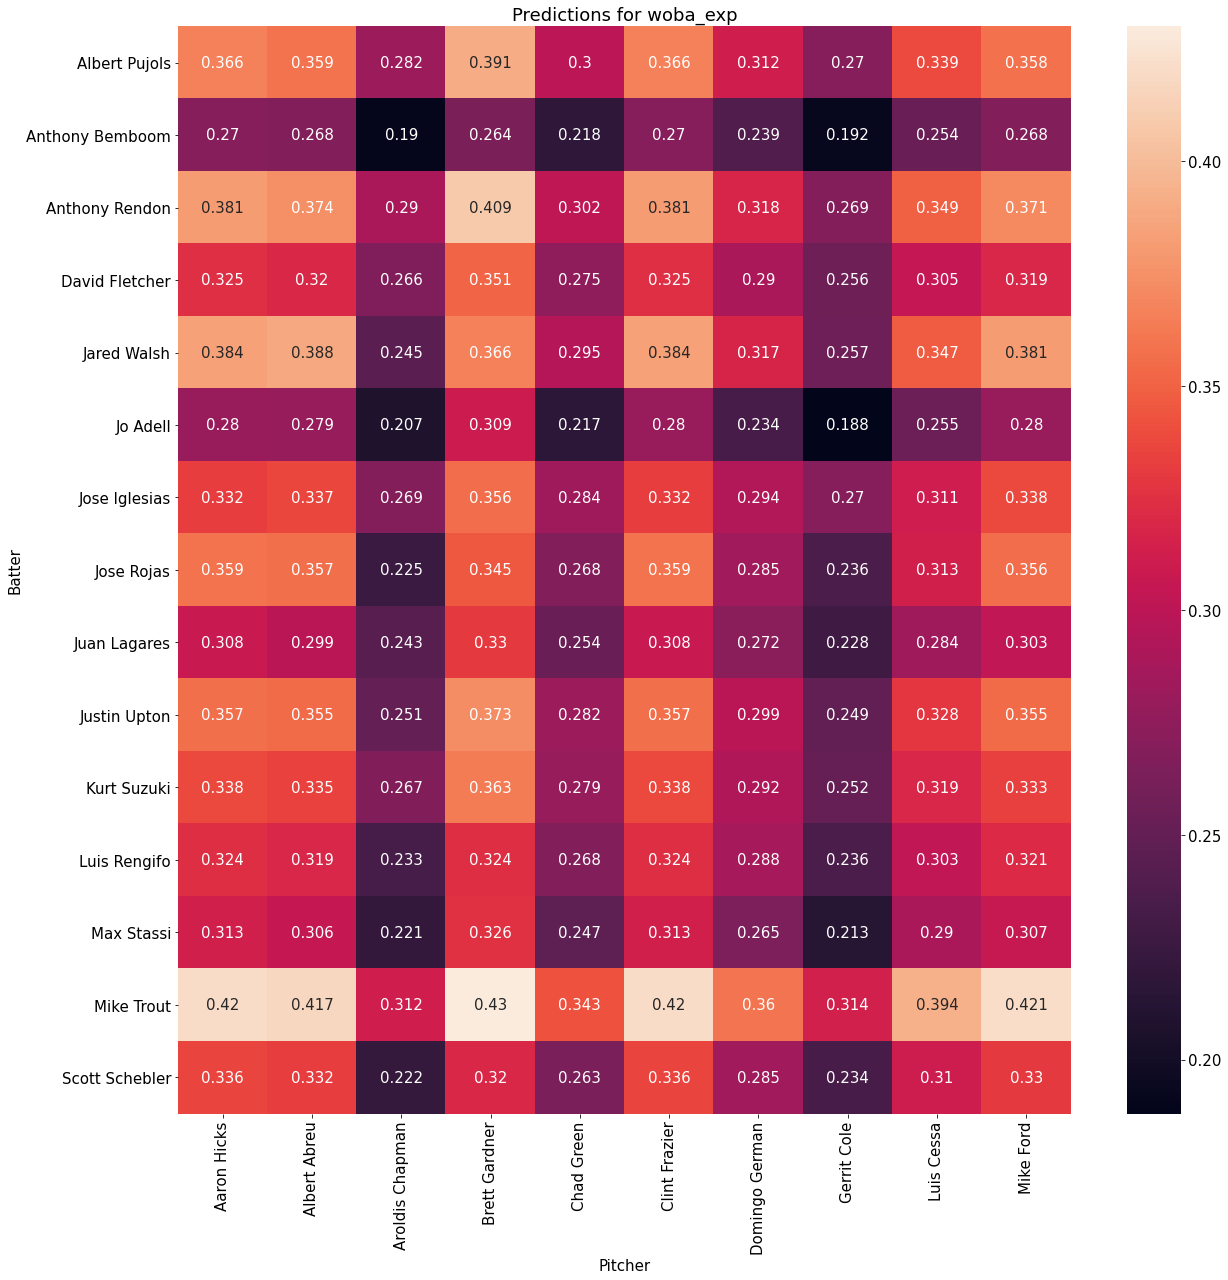

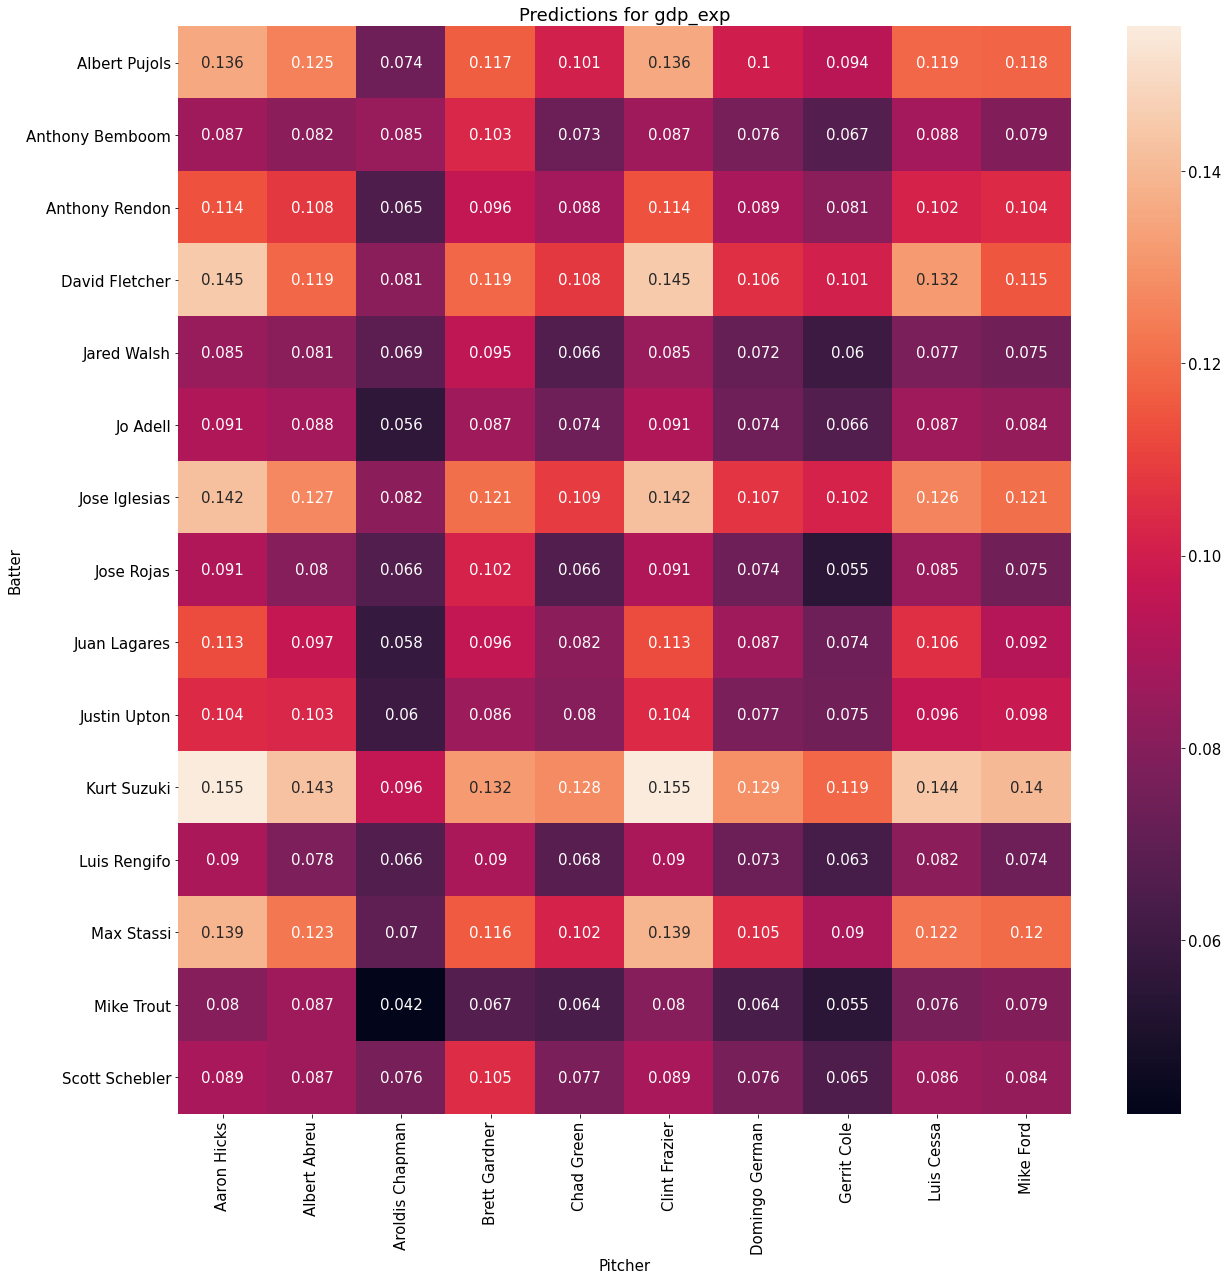

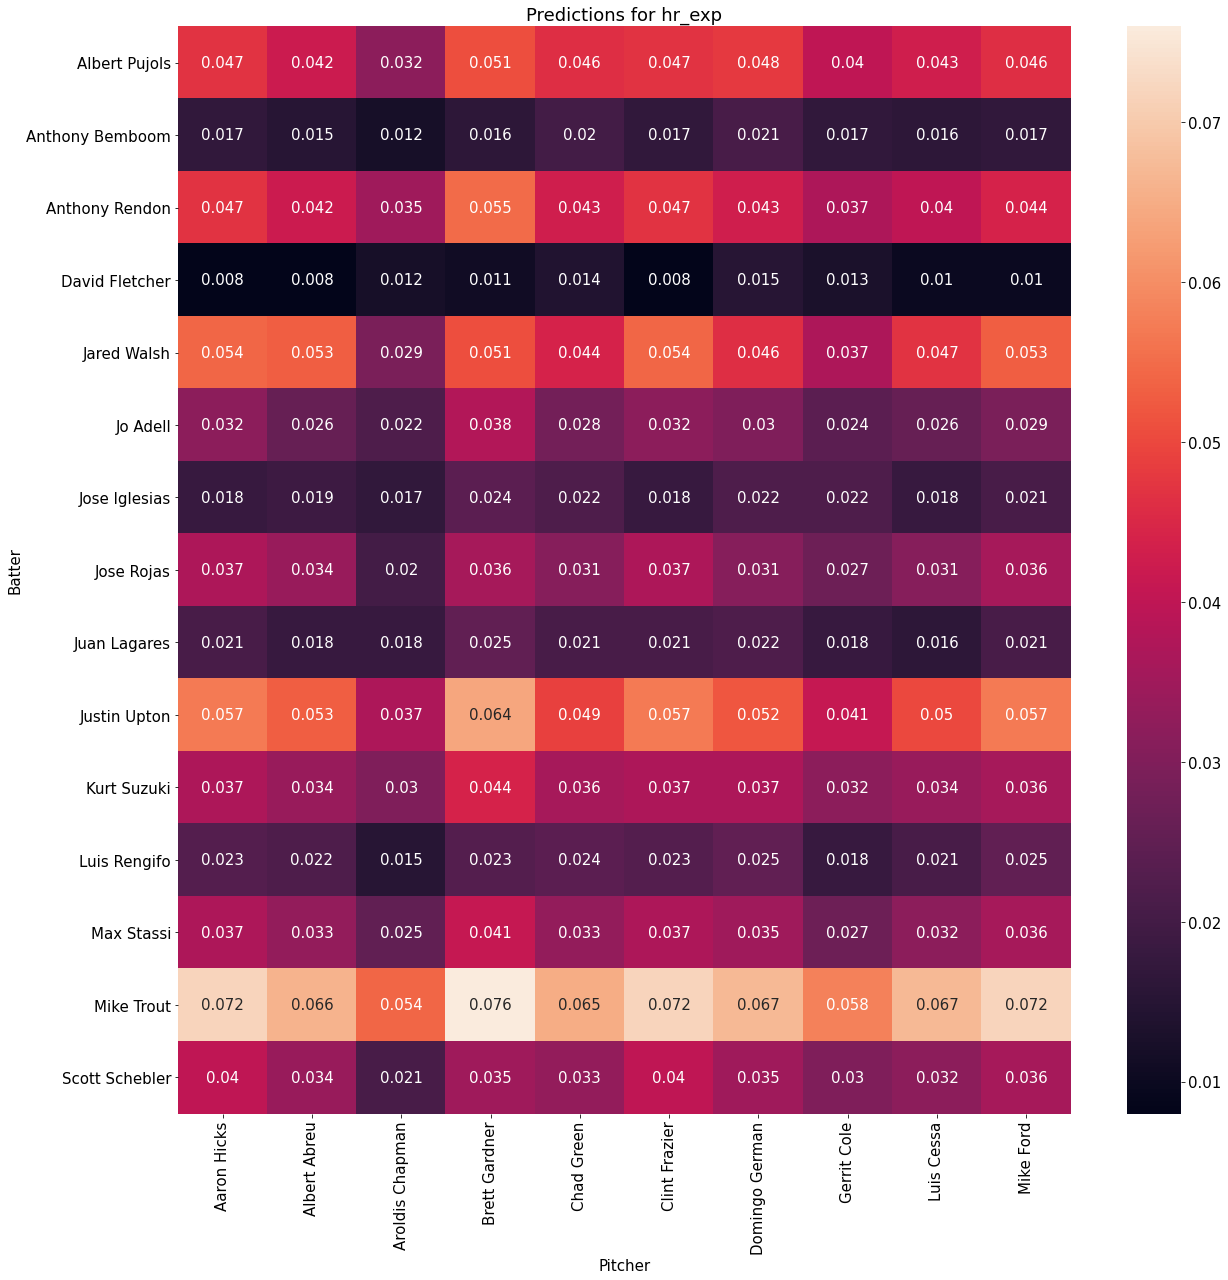

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

def plot_results(df, keys):
    
    if keys is None: 
        return
    for key in keys:
        df[key] = pd.Series([float("{0:.3f}".format(float(val * 1))) for val in df[key]], index = df.index)
        df_pivot = df.pivot(index='batter_name', columns='pitcher_name', values=key)
        plt.figure(figsize=(20, 20))
        plt.rcParams.update({'font.size': 15})
        sns.heatmap(df_pivot, annot=True, fmt='g')
        plt.title(f'Predictions for {key}', wrap=True)
        plt.xlabel('Pitcher')
        plt.ylabel('Batter')
        plt.yticks(rotation=0)
        plt.show()
    
plot_results(results, ['woba_exp', 'gdp_exp', 'hr_exp'])
    
    

#Details about the prediction and on an old date

In [13]:
trout_vs_cole = Matchup(
    batter=sing.get_players(name='Mike Trout')[0]
    ,pitcher=sing.get_players(name='Gerrit Cole')[0]
    ,atmosphere=atmosph
    ,state=State()
    ,date='2020-09-14'
)

results = pd.DataFrame(sing.get_pa_sim([trout_vs_cole], return_features = True))
print(f"Here are the details your prediction:\n{results}")

Here are the details your prediction:
   batter  pitcher batter_name pitcher_name  outs  inning  p_pitch_no  on_1b  \
0  545361   543037  Mike Trout  Gerrit Cole     0       1           0      0   

   on_2b  on_3b    bb_exp    ci_exp  double_exp        dp_exp     e_exp  \
0      0      0  0.135324  0.000082    0.032796  2.544758e-16  0.004553   

   f_out_exp        fc_exp      fc_o_exp        fo_exp       gdp_exp  \
0   0.337693  5.762106e-18  2.839477e-17  5.504166e-15  5.295584e-16   

    hbp_exp    hr_exp   ibb_exp        sf_exp     sf_dp_exp        sh_exp  \
0  0.008026  0.067842  0.000013  2.945157e-22  3.654567e-24  4.194559e-15   

   single_exp    so_exp     so_dp_exp        tp_exp  triple_exp    ba_exp  \
0    0.077513  0.334847  2.038051e-15  1.250606e-17    0.001312  0.209516   

    obp_exp   slg_exp   ops_exp  woba_exp  PREDICTIVE_DATA_b_21_pa  \
0  0.322852  0.488478  0.811329   0.34567                     82.0   

   PREDICTIVE_DATA_b_21_single_per_pa  PREDICTIVE_DATA